In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn import linear_model
from sklearn.model_selection import cross_validate, ShuffleSplit


In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [31]:
df.sort_values('bedrooms')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9877,1231000310,8/12/2014,713000.0,1,1.00,1180,4000,1.5,NO,AVERAGE,...,8 Good,840,340.0,1910,0.0,98118,47.5561,-122.266,1420,4000
9536,2658000115,6/18/2014,190000.0,1,1.00,720,4800,1.0,NO,NONE,...,6 Low Average,720,0.0,1914,0.0,98118,47.5303,-122.270,1240,4860
14332,1523300180,7/9/2014,321500.0,1,1.00,730,1942,1.0,NO,NONE,...,7 Average,730,0.0,2008,0.0,98144,47.5939,-122.299,1020,2183
14340,2009003136,8/22/2014,325000.0,1,1.00,1220,12426,1.0,NO,EXCELLENT,...,6 Low Average,1220,0.0,1946,NaN,98198,47.4047,-122.331,2770,22270
12823,1154100205,10/13/2014,305000.0,1,1.00,900,7500,1.0,NO,NONE,...,5 Fair,900,0.0,1946,NaN,98155,47.7553,-122.283,1470,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,NO,NONE,...,7 Average,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,NO,AVERAGE,...,9 Better,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,NO,NONE,...,7 Average,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,...,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [60]:
df_numeric = df.drop(['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement'], axis = 1)
df_numeric = df_numeric.dropna()
df_numeric

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:>

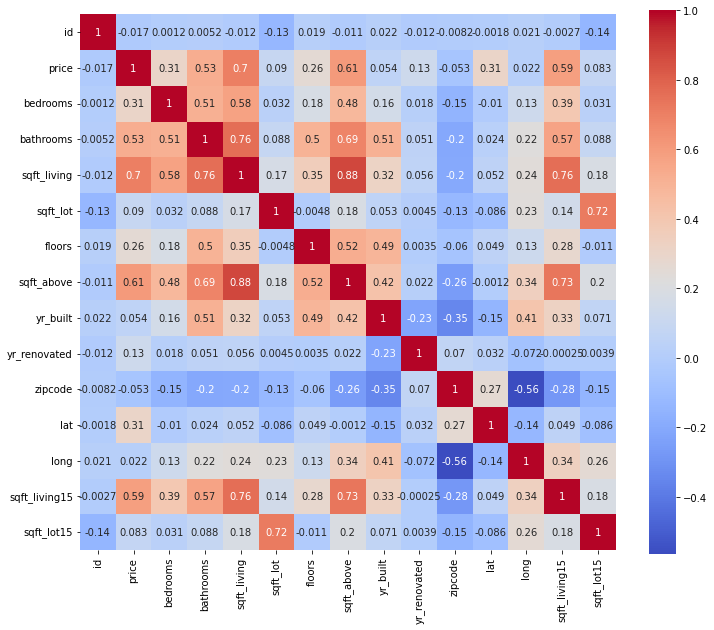

In [6]:
plt.figure(figsize = (12, 10))

sns.heatmap(df.corr(), cmap="coolwarm", annot = True, square = True)

In [68]:
size = df[['bedrooms','bathrooms','sqft_living','sqft_above','sqft_living15']]
X = df[['bedrooms','bathrooms','sqft_living','sqft_above','sqft_living15']]
y = df['price']

In [69]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=size,
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

Current Model
Train score:      0.5107493900027911
Validation score: 0.5208743827553185



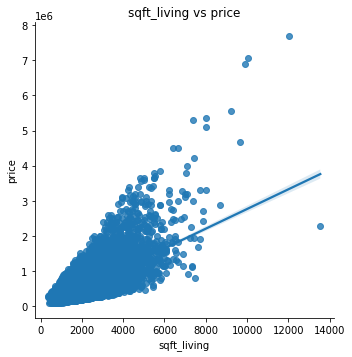

In [70]:
sns.lmplot(data=df, x='sqft_living', y='price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living vs price');

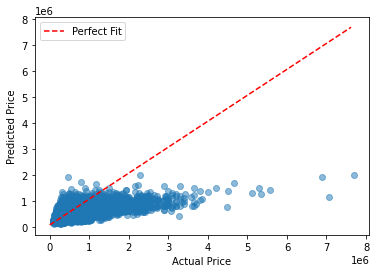

In [77]:
final_model = LinearRegression()
X = df[['bedrooms','bathrooms']]
final_model.fit(X, df['price'])
final_model.score(X, df['price'])




preds = final_model.predict(X)
fig, ax = plt.subplots()

perfect_line = np.arange(df['price'].min(), df['price'].max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(df['price'], preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [83]:
model1 = sm.OLS(endog=y, exog=X).fit()

In [84]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                          3.651e+04
Date:                Wed, 11 May 2022   Prob (F-statistic):                        0.00
Time:                        14:48:51   Log-Likelihood:                     -3.0387e+05
No. Observations:               21597   AIC:                                  6.078e+05
Df Residuals:                   21595   BIC:                                  6.078e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms     1.34e+04   2000.964      6.695      0.000    9474.319    1.73e+04
bathrooms    2.35e+05   3109.194     75.597      0.000    2.29e+05    2.41e+05
==============================================================================
Omnibus:                    17581.165   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           943545.605
Skew:                           3.542   Prob(JB):                         0.00
Kurtosis:                      34.597   Cond. No.                         7.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

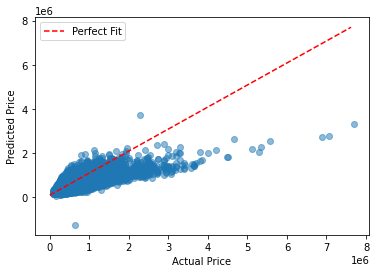

In [86]:
final_model = LinearRegression()
X2 = df[['bedrooms','bathrooms','sqft_living','sqft_living15']]
final_model.fit(X2, df['price'])
final_model.score(X2, df['price'])




preds = final_model.predict(X2)
fig, ax = plt.subplots()

perfect_line = np.arange(df['price'].min(), df['price'].max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(df['price'], preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [87]:
model2 = sm.OLS(endog=y, exog=X2).fit()

In [88]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                          2.960e+04
Date:                Wed, 11 May 2022   Prob (F-statistic):                        0.00
Time:                        14:49:36   Log-Likelihood:                     -2.9964e+05
No. Observations:               21597   AIC:                                  5.993e+05
Df Residuals:                   21593   BIC:                                  5.993e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -5.155e+04   1817.141    -28.367      0.000   -5.51e+04    -4.8e+04
bathrooms      9735.2262   3382.292      2.878      0.004    3105.685    1.64e+04
sqft_living     270.5674      3.549     76.230      0.000     263.610     277.524
sqft_living15    65.2581      3.474     18.786      0.000      58.449      72.067
==============================================================================
Omnibus:                    14988.554   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           594593.969
Skew:                           2.846   Prob(JB):                         0.00
Kurtosis:                      28.067   Cond. No.                     6.13e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
filtered_df = df[df['bedrooms'] < 10]
filtered_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Text(0.5, 0, 'price($)')

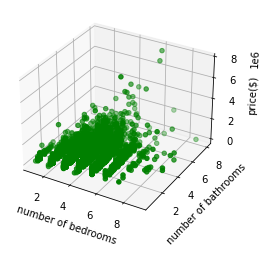

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# X = df[['bedrooms','bathrooms']].values.reshape(-1,1)
# ols = linear_model.LinearRegression()
# model = ols.fit(X,y)
# response = model.predict(X)
x1 = filtered_df['bedrooms']
x2 = filtered_df['bathrooms']

ax.scatter(x1, x2, filtered_df['price'], c = 'g', marker = 'o')
#ax.plot(X, response, color='k', label='Regression model')
ax.set_xlabel('number of bedrooms')
ax.set_ylabel('number of bathrooms')
ax.set_zlabel('price($)')

In [38]:
X = filtered_df[['bedrooms', 'bathrooms']]
y = filtered_df['price']
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

InvalidIndexError: (slice(None, None, None), None)

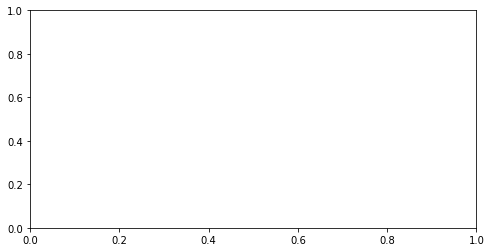

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')